In [567]:
#import sys
import csv
import matplotlib.pyplot as plt
#import numpy as np
import statistics as st

### Constants
k_TimeStampIndex = 0
k_SpeedIndex   = 1
k_YawIndex     = 2
k_YawRateIndex = 3

time_label = 'time(s)'

speed_title = 'Speed (m/s)'
speed_label = 'Speed (m/s)'

yawrate_title = 'Yaw rate (deg/s)'
yawrate_label = 'Yaw rate (deg/s)'

yaw_title = 'Yaw angle (deg)'
yaw_label = 'Yaw (deg)'

###
save_plot = False
sampT = 0.1 # [s]

In [568]:
def differentiate(x_, Ts_):
    # Compute rate
    print("... Computing rate")
    len_x_ = len(x_)
    #print(len_x_)
    y_ = []
    if len_x_ > 1:
        y_.append(0.0)
        for i in range(1, len_x_ ):
            #print(i)
            tmp = (x_[i] - x_[i-1]) / Ts_
            y_.append(tmp)
    else:
        print("... Error: Vector length is less than 1")

    print("len_x : ", len_x_ , "\tlen_y : ", len(y_))
    return y_

In [ ]:
def text_bold(str):
    # Returns a bolded text string for printing
    return '\033[1m' + str + '\033[0m'


def text_hlight(str):
    # Returns a highlighted text string for printing
    return '\033[7m' + str + '\033[0m'


def text_alert(str):
    # Returns a highlighted and bolded text string
    return '\033[1m\033[7m' + str + '\033[0m'

In [569]:
def print_array(input):

    for row in input:
        for cell in row:
            print(cell+ " ", end = " ")
        print("")
    # Move to new line

In [570]:
def get_column(csv_filename, n_col):
    x = []
    # linecnt = 0

    print("... Getting Column Data:", n_col)
    
    with open(csv_filename,'r') as csvfile:
        obj_csvreader = csv.reader(csvfile, delimiter=',')
        next(obj_csvreader) # to ignore first row (csv header)
        #   
        for row in obj_csvreader:
            x.append(float(row[n_col]))
            # linecnt += 1

    return x


In [571]:
def plot(x, y, title, ylabel, xlabel = 'time (s)', ylim = 'default', fig_name = "fig.png"):
    #print(x), print(y)
    #print("Standard Deviation", st.stdev(y))
    print("... Plotting")
    plt.scatter(x, y, color = 'g',s = 15)
    plt.xticks(rotation = 25)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize = 20)
    plt.ylim(ylim)
    plt.grid()
    
    plt.show()	

    if save_plot: 
        # fig_name = title + ".png"
        # plt.plot()
        plt.savefig(fig_name)
        print("... Figure saved")

In [572]:
def parse_gps_data(filename):
    input_file = open(str(filename), "r")

    output_array = []
    first_row = ["Timestamp(s)", "Speed(m/s)", "Yaw angle(deg)", "Yaw rate(deg/s)"]

    output_array.append(first_row)
    #print_array(output_array)
    first_row = 1
    print("... Parsing Data")

    rot_dir_ = 1 # rotation direction 1: increasing yaw, -1: decreasing yaw 
    n_rot_ = 0 # number of rotations completed

    while True:
        line = input_file.readline()
        if not line:
            break
        
        if str(line[0:8]) == "<BESTVEL":
            # retrieve timestamp
            bestvel_line = line.split(" ")
            time_stamp = bestvel_line[6]
            
            if first_row:
                time_0 = time_stamp
                first_row = 0
            
            time_ = str(float (time_stamp) - float(time_0))

            line = input_file.readline()
            line = input_file.readline()
            if not line:
                break
                    
            solcomp_bestvel_line = line.split(" ")
            speed_ = solcomp_bestvel_line[9]
            tmp_ = solcomp_bestvel_line[10] # + rot_dir_ * n_rot_ * 360.0
            yaw_angle_ = tmp_ + rot_dir_ * n_rot_ * 360.0
            # yaw_rate_ = ( yaw_angle_ - yaw_angle_prev_ ) /  sampT
            # if abs(yaw_rate_) > 3000:
            #   n_rot_ += 
            # Yaw rate calculated later
            output_array.append([time_, speed_, yaw_angle_, "0.0"])

    # Compute yaw rate
    print("... Computing yaw rate")
    if len(output_array) > 1:
        for i in range(2, len(output_array)):
            val = (float(output_array[i][2]) - float(output_array[i-1][2]))/(float(output_array[i][0]) - float(output_array[i-1][0]))
            output_array[i][3] = str(val)

    # print_array(output_array)
    input_file.close()

    return output_array

In [573]:
def write_csvfile(csv_filename, data):
    print("... Writing .csv file")
    with open(csv_filename,"w") as my_csv:
        csvWriter = csv.writer(my_csv,delimiter=',')
        csvWriter.writerows(data)
        
    print("\n... file: ", csv_filename, " created")

In [574]:
### Paths and file extensions
inp_filepath = "D6nData_230411/" #"data/" # gps data folder
inp_file_ext = ".gps"

out_filepath = "D6nData_230411/" #"csv_data/" # csv data folder
out_file_ext = ".csv"

### user specified files
inp_gpsfilename = "revright1"
out_csvfilename = "revright1"

gps_filename = inp_filepath + inp_gpsfilename + inp_file_ext
csv_filename = out_filepath + out_csvfilename + out_file_ext

In [575]:
parsed_output = parse_gps_data(gps_filename)

_ = write_csvfile(csv_filename, parsed_output)

... Parsing Data
... Computing yaw rate
... Writing .csv file

... file:  D6nData_230411/YawRate/revright1.csv  created


In [576]:
### Data for Plotting from .csv
time    = get_column (csv_filename, k_TimeStampIndex)
speed   = get_column (csv_filename, k_SpeedIndex)
yaw     = get_column (csv_filename, k_YawIndex)
yawrate = get_column (csv_filename, k_YawRateIndex)

... Getting Column Data: 0
... Getting Column Data: 1
... Getting Column Data: 2
... Getting Column Data: 3


... Plotting


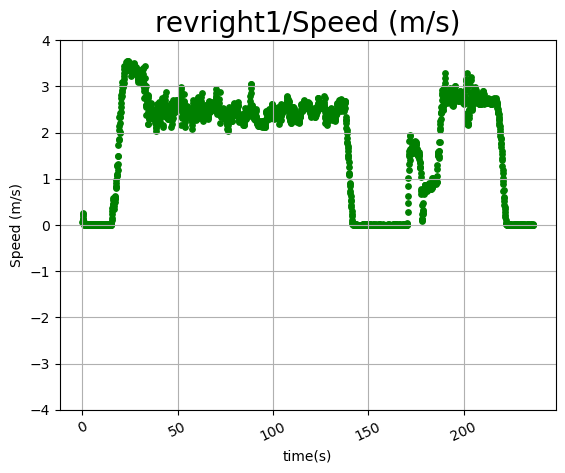

... Plotting


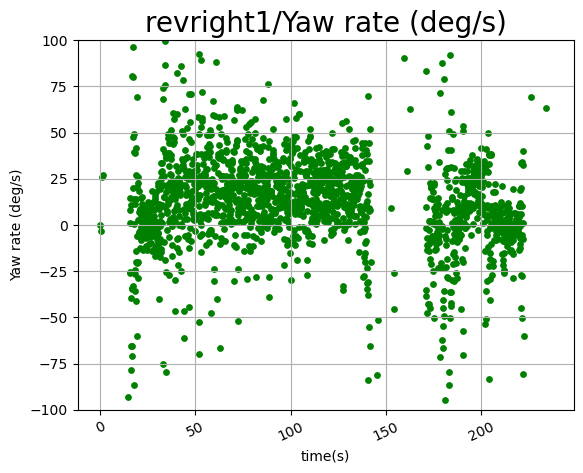

... Plotting


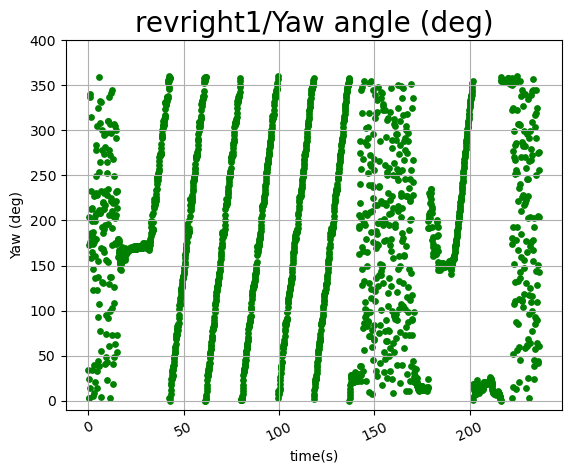

In [577]:
### Plotting
# Speed
title = inp_gpsfilename + "/" + speed_title
fig_name = inp_filepath + inp_gpsfilename + "_speed" + ".png"
plot (time, speed, title, speed_label, time_label, [-4, 4], fig_name)

# Yaw rate
title = inp_gpsfilename + "/" + yawrate_title
fig_name = inp_filepath + inp_gpsfilename + "_yawrate" + ".png"
plot (time, yawrate, title, yawrate_label, time_label, [-100, 100], fig_name)

# Yaw angle
title = inp_gpsfilename + "/" + yaw_title
fig_name = inp_filepath + inp_gpsfilename + "_yaw" + ".png"
plot (time, yaw, title, yaw_label, time_label, [-10, 400], fig_name)

In [578]:
### For Partial Data analysis
def data_analysis():
   speed_mean   = []
   speed_median = []
   speed_stdev  = []
   yawrate_avg  = []
   yawrate_stdev  = []
   yawrate_mean   = []
   yawrate_median = []
   # Yaw rate
   t0 = 56.0 #38.0 # 37.2
   t1 = 74.0 #55.0 # 55.4
   idx0 = int(t0 / sampT)
   idx1 = int(t1 / sampT)
   # slice data
   speed_data = speed[idx0 : idx1]
   yaw_data = yaw[idx0 : idx1]
   yawrate_data = yawrate[idx0 : idx1]
   # analysis
   speed_mean.append(st.mean(speed_data))
   speed_median.append(st.median(speed_data))
   speed_stdev.append(st.stdev(speed_data))
   yawrate_avg.append((yaw_data[-1] - yaw_data [0]) / (t1 - t0))
   yawrate_stdev.append(st.stdev(yawrate_data))
   yawrate_mean.append(st.mean(yawrate_data))
   yawrate_median.append(st.median(yawrate_data))

   return

... Computing rate
len_x :  2366 	len_y :  2366
... Plotting


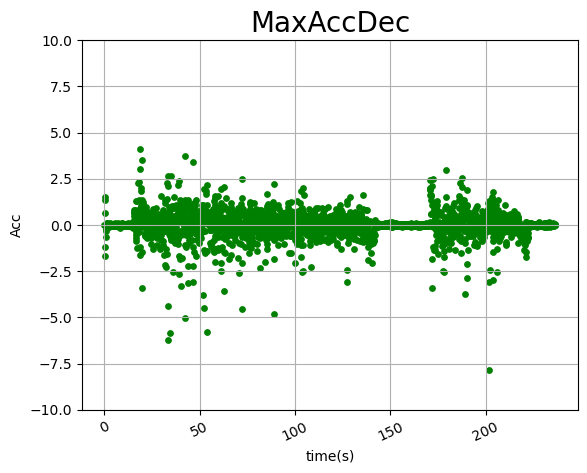

In [579]:
linear_acc = []

linear_acc = differentiate (speed, sampT)

plot(time, linear_acc, "MaxAccDec", "Acc", time_label, [-10, 10], "fig.png")